# Klasyfikacja Gwiazd

## Wykonali: Michał Janaszewski i Jakub Wypych

### Opis
Celem projektu jest klasyfikacje gwiazd 100_000 obserwacji wykonanych przez SDSS (Sloan Digital Sky Survey). Każda obserwacja jest opisana za pomocą 17 artybutów i jednego atrybutu klasyfikującego o nazwie 'class'.

### Atrybuty i ich opis
* obj_ID = Identyfikator obiektu, unikalna wartość identyfikująca obiekt w katalogu obrazów używanym przez CAS
* alpha = Kąt rektascensji (w epoce J2000)
* delta = Kąt deklinacji (w epoce J2000)
* u = Filtr ultrawioletowy w systemie fotometrycznym
* g = Zielony filtr w systemie fotometrycznym
* r = Czerwony filtr w systemie fotometrycznym
* i = Filtr bliskiej podczerwieni w systemie fotometrycznym
* z = Filtr podczerwieni w systemie fotometrycznym
* run_ID = Numer skanu używany do identyfikacji konkretnej obserwacji
* rereun_ID = Numer powtórzenia określający, w jaki sposób obraz został przetworzony
* cam_col = Kolumna kamery identyfikująca linijkę skanu w ramach skanu
* field_ID = Numer pola identyfikujący każde pole
* spec_obj_ID = Unikalny identyfikator używany dla obiektów spektroskopowych (to oznacza, że 2 różne obserwacje o tym samym spec_obj_ID muszą mieć tę samą klasę wynikową)
* class = Klasa obiektu (galaktyka, gwiazda lub kwazar)
* redshift = Wartość przesunięcia ku czerwieni oparta na wzroście długości fali
* plate = Identyfikator płyty, identyfikuje każdą płytę w SDSS
* MJD = Zmodyfikowana data juliańska, używana do wskazania, kiedy dane SDSS zostały zebrane
* fiber_ID = Identyfikator włókna identyfikujący włókno, które skierowało światło na płaszczyznę ogniskową w każdej obserwacji

---

**Importy niezbędnych bibliotek i danych**

In [1]:
# Początkowe importy
import pandas as pd

# Wczytywanie pliku
path = "data/star_classification.csv"
df_og = pd.read_csv(path)
df_og.head(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


---

### Analiza eksplotacyjna danych

In [6]:
# liczba obiektów
print("Łączna liczba obiektów (obserwacji) =", df_og.shape[0])

# liczba klas
print("Liczba klas =", df_og["class"].unique().shape[0])

# liczba obiektów w każdej klasie
for i in list(df_og['class'].unique()):
    print("Liczba obiektow w klasie ", i, " = ", len(df_og[df_og['class'] == i]))

# liczba atrybutów
print("Liczba atrybutów/cech =", df_og.shape[1])

# liczba danych brakujących
print("Brakow =", df_og.isnull().sum().sum())

#ustawienie klasy jako ostatni atrybut
df = df_og[[col for col in df_og.columns if col != 'class'] + ['class']]

# wypisanie
df.head(5)

Łączna liczba obiektów (obserwacji) = 100000
Liczba klas = 3
Liczba obiektow w klasie  GALAXY  =  59445
Liczba obiektow w klasie  QSO  =  18961
Liczba obiektow w klasie  STAR  =  21594
Liczba atrybutów/cech = 18
Brakow = 0


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,GALAXY
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,GALAXY
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,GALAXY
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,GALAXY
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,GALAXY


### Usunięcie niepotrzebnych atrybutów
**Z samego opisu atrybutu**
Atrybuty takie jak obj_ID, run_ID, rerun_ID i MJD sa atrybutami które nie są porzyteczne w klasyfikacji gwiazd, ponieważ:
* obj_ID: jest to unikalny identyfikator dla każdego obiektu, który nie ma nic wspólnego z obserwowaną gwiazdą
* run_ID: jest to numer skanu konkretnej obserwacji, co nie ma nic wspólnego z obserwowaną gwiazdą
* rerun_ID: jest to numer określający w jaki sposób obraz został przetworzony, co nie ma nic wspólnego z obserwowaną gwiazdą
* MJD: jest to data kiedy dana obserwacja została zebrana, co nie ma nic wspólnego z obserwowaną gwiazdą

TODO: fiber_ID, field_ID

In [7]:
df.drop(['obj_ID','run_ID','rerun_ID', 'MJD'], axis=1, inplace=True)
df.head(5)

C:\Users\Ja\AppData\Local\Temp\ipykernel_23544\3726593200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['obj_ID','run_ID','rerun_ID', 'MJD'], axis=1, inplace=True)


,alpha,delta,u,g,r,i,z,cam_col,field_ID,spec_obj_ID,redshift,plate,fiber_ID,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,79,6.543777e+18,0.634794,5812,171,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,119,1.176014e+19,0.779136,10445,427,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,120,5.152200e+18,0.644195,4576,299,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,214,1.030107e+19,0.932346,9149,775,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,137,6.891865e+18,0.116123,6121,842,GALAXY


<Axes: >

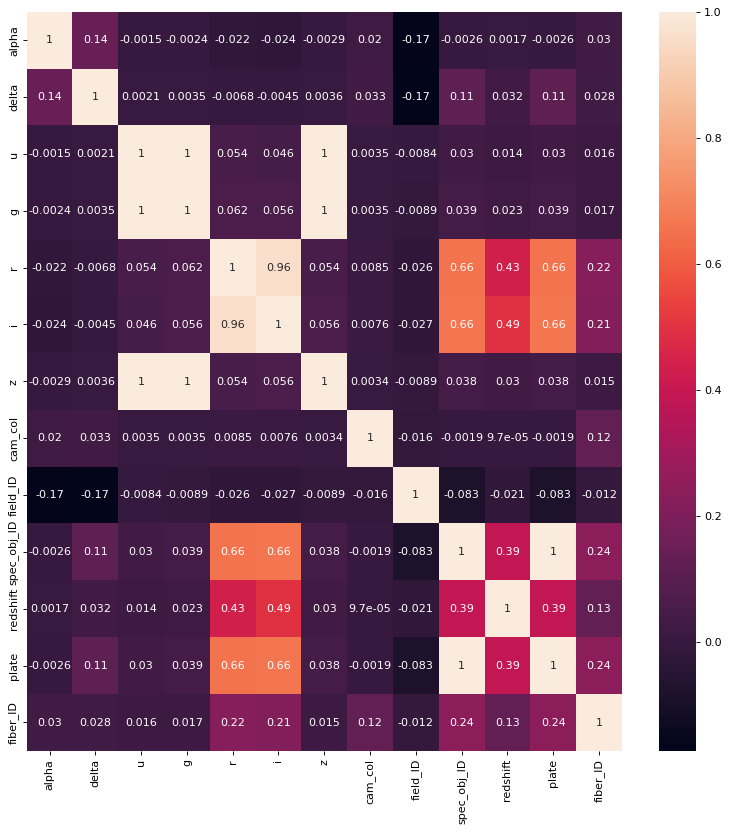

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# TODO
corr = df.iloc[:,:-1].corr()
plt.figure(figsize = (12, 12), dpi = 80)
sns.heatmap(corr,annot = corr)

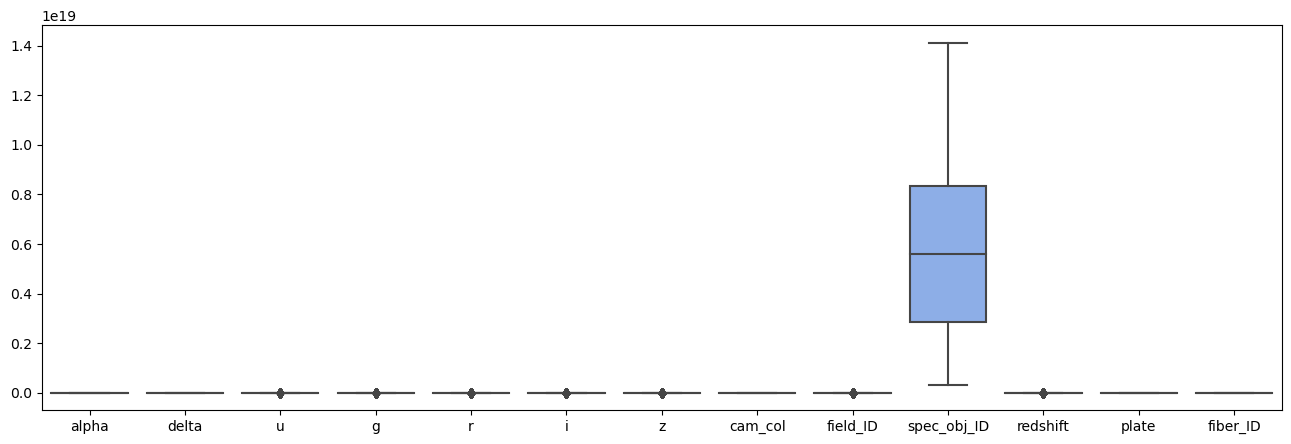

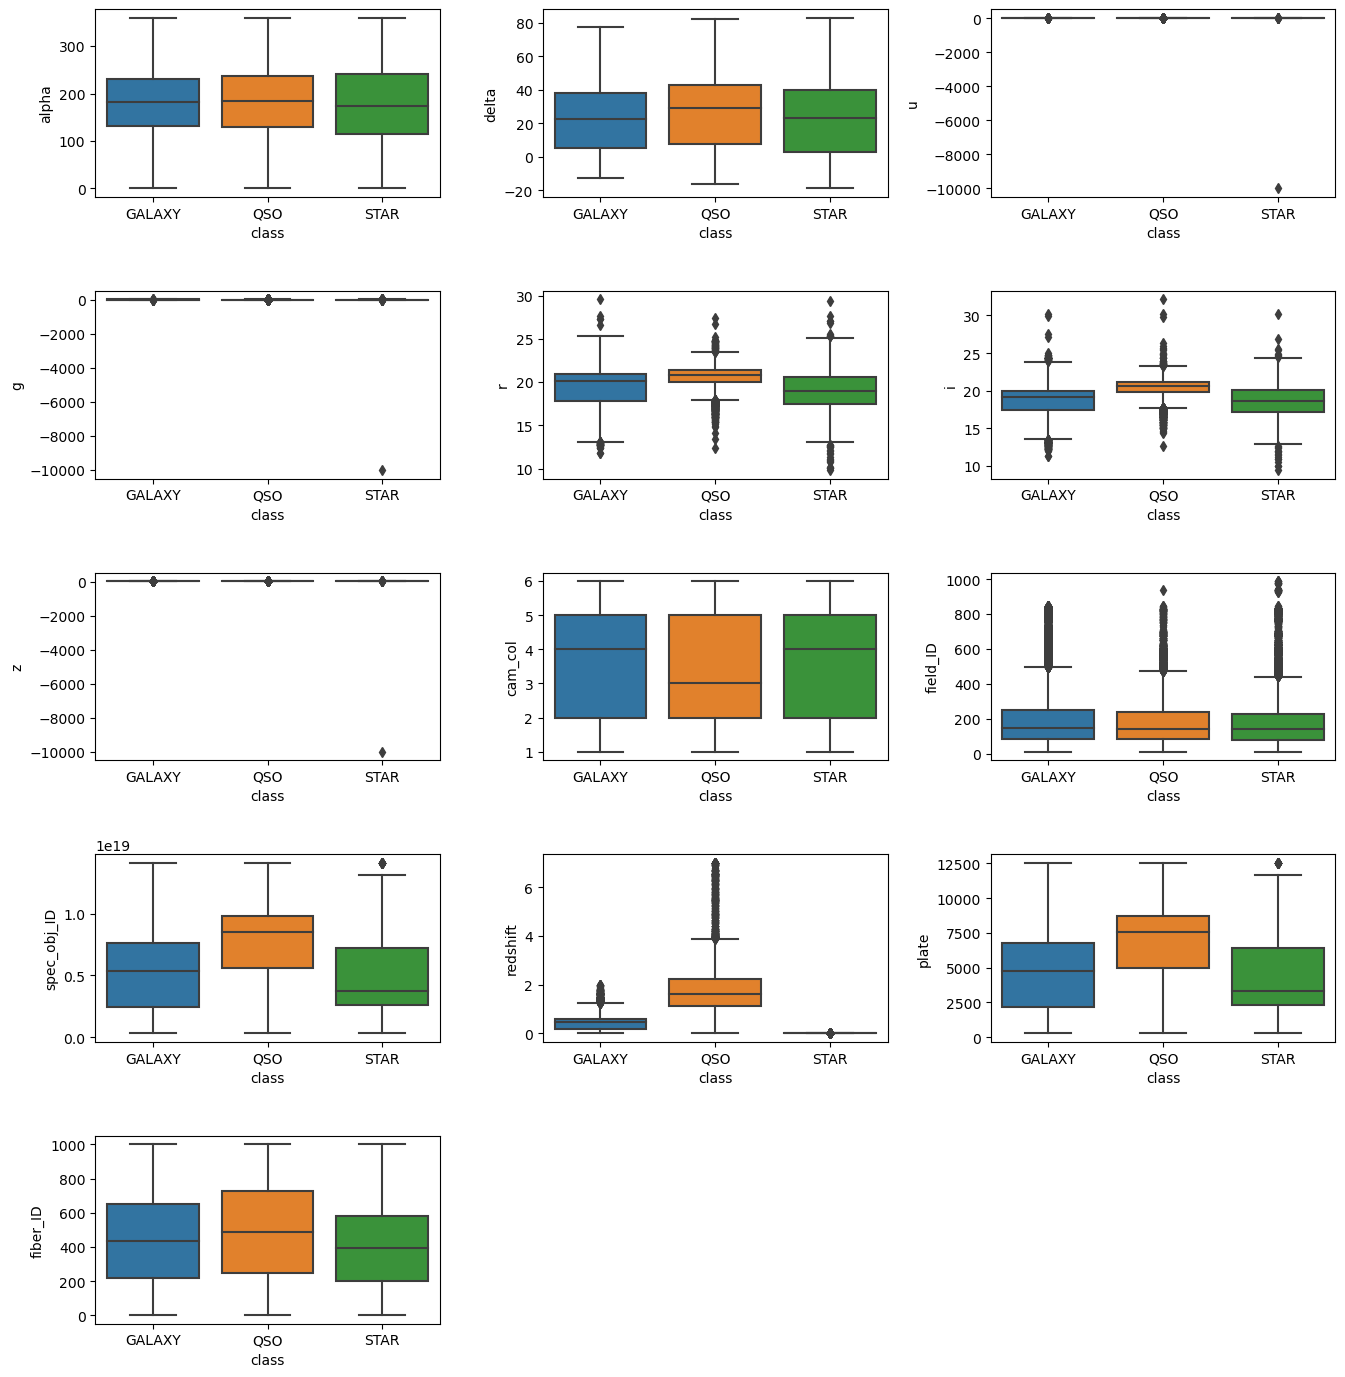

In [9]:
plt.figure(figsize=(16, 5))
sns.boxplot(data=df)

atryb= df.columns.tolist()
plt.figure(figsize=(16, 50))
for i, atr in enumerate(atryb[:-1], 0):
    plt.subplot(len(atryb), 3, i + 1)
    sns.boxplot(x="class", y=atr, data=df)
    
plt.subplots_adjust(hspace=0.5, wspace =0.3)
plt.show()

In [10]:
#Z uruamianiem tego kodu należy uważać !!! Może długo trać wykonanie zwłąszcza na słabszym sprzęcie
#sns.pairplot(df, kind="scatter", hue = "class")  
#plt.show()

## Wnioski z analizy eksplotacyjnej danych

### Dane nadmiarowe

#### Analiza wykresów punktowych
Z analizy wykresów można zobaczyć, że atrybuty 'cam_col', 'fiber_ID' oraz 'field_ID'  nie będzą zbytnio przydatne w dalszej analizie i klasyfikacji. Są mało przydatne z perspektywy rozróżnialności klas.

#### Analiza wykresów pudełkowych
Atrybuty 'g','z','u' posiadają punkty znacznie oddalone zaburzające skale, główne dane są niewidoczne co utrudniajakąkoliwek sensowną analizę. Dane są w okoliczach zera (dokładnej skali nie można odczytać), a punkty odstające w odległoci -10000. Poprzez usunięcie punków odstających można uzyskać więcej informacji w pononej analizie.

Atrybuty mają różne skale zmienności np. spec_obj_ID zmienia się od 0 do 10<sup>19</sup>, a redshift tylko od 0 do 6.

#### Analiza mapy ciepła 
Atrybuty wykazujące wysoki stopień korelacji względam siebie zawierają nadmiarowe informacji można usunąć 1 z nich:
* 'g', 'u', 'z' - stopień koreclacji 1 - zostawiamy 'g'
* 'i', 'r' - stopień koreclacji 0,96 - zostawiamy 'i'
* 'spec_obj_ID' oraz 'plate' - stopień koreclacji 1 - zostawiamy 'plate'

### Wnioski ogólne

Występują 3 różne klasy, ich rozmieszczenie jest nie równomierne do klasy GALAXY zostało zaklasyfikowanych około 60% wszystkich obsserwacji.

Dane są spójne, nie występują żadne braki.




## Ponowienie analizy eksplotacyjej danych z uwzględnieniem zmian
### Usunięcie niepotrzebnych atrybutów

In [15]:
import numpy as np
cols_to_rem = ['cam_col', 'fiber_ID', 'field_ID','u','z','r','spec_obj_ID'] 
ref_df = df.drop(columns=cols_to_rem)

def remove_outliers(df, col, threshold=10):
    mean_value = df[col].mean()
    std_value = df[col].std()
    outlier_condition = np.abs(df[col] - mean_value) > threshold * std_value
    rem_points = outlier_condition.sum()
    df = df[~outlier_condition]
    return df, rem_points

ref_df, rem_points = remove_outliers(ref_df,'g')
print(f'usunięto {rem_points} punktów odstających')

usunięto 1 punktów odstających


### Analiza

In [13]:
# liczba obiektów
print("Łączna liczba obiektów (obserwacji) =", ref_df.shape[0])

# liczba klas
print("Liczba klas =", ref_df["class"].unique().shape[0])

# liczba obiektów w każdej klasie
for i in list(ref_df['class'].unique()):
    print("Liczba obiektow w klasie ", i, " = ", len(df_og[df_og['class'] == i]))

# liczba atrybutów
print("Liczba atrybutów/cech =", ref_df.shape[1])

# liczba danych brakujących
print("Brakow =", ref_df.isnull().sum().sum())



# wypisanie
ref_df.head(5)

Łączna liczba obiektów (obserwacji) = 99999
Liczba klas = 3
Liczba obiektow w klasie  GALAXY  =  59445
Liczba obiektow w klasie  QSO  =  18961
Liczba obiektow w klasie  STAR  =  21594
Liczba atrybutów/cech = 7
Brakow = 0


,alpha,delta,g,i,redshift,plate,class
0,135.689107,32.494632,22.27530,19.16573,0.634794,5812,GALAXY
1,144.826101,31.274185,22.83188,21.16812,0.779136,10445,GALAXY
2,142.188790,35.582444,22.66389,19.34857,0.644195,4576,GALAXY
3,338.741038,-0.402828,23.77656,20.50454,0.932346,9149,GALAXY
4,345.282593,21.183866,17.58028,15.97711,0.116123,6121,GALAXY


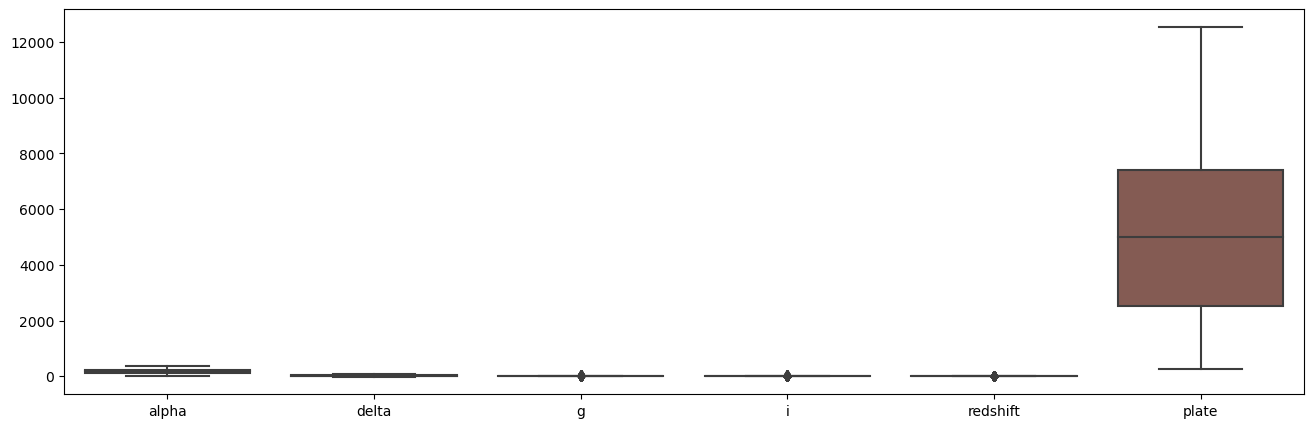

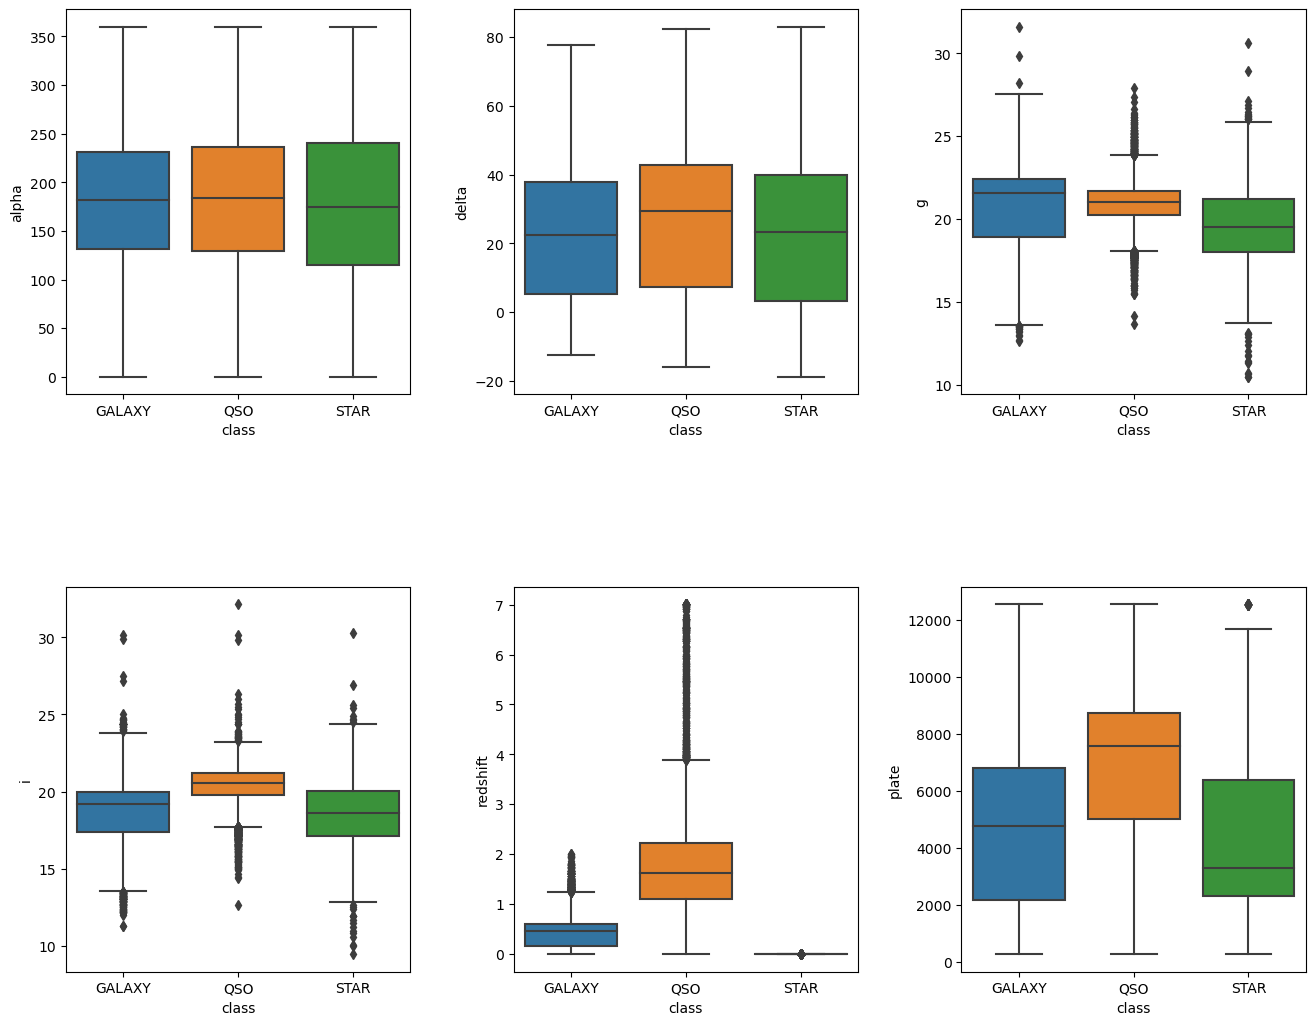

In [18]:
plt.figure(figsize=(16, 5))
sns.boxplot(data=ref_df)

atrybuty = ref_df.columns.tolist()
plt.figure(figsize=(16, 50))
for i, atr in enumerate(atrybuty[:-1], 0):
    plt.subplot(len(atrybuty), 3, i + 1)
    sns.boxplot(x="class", y=atr, data=ref_df)
    
plt.subplots_adjust(hspace=0.5, wspace =0.3)
plt.show()

C:\Users\Ja\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


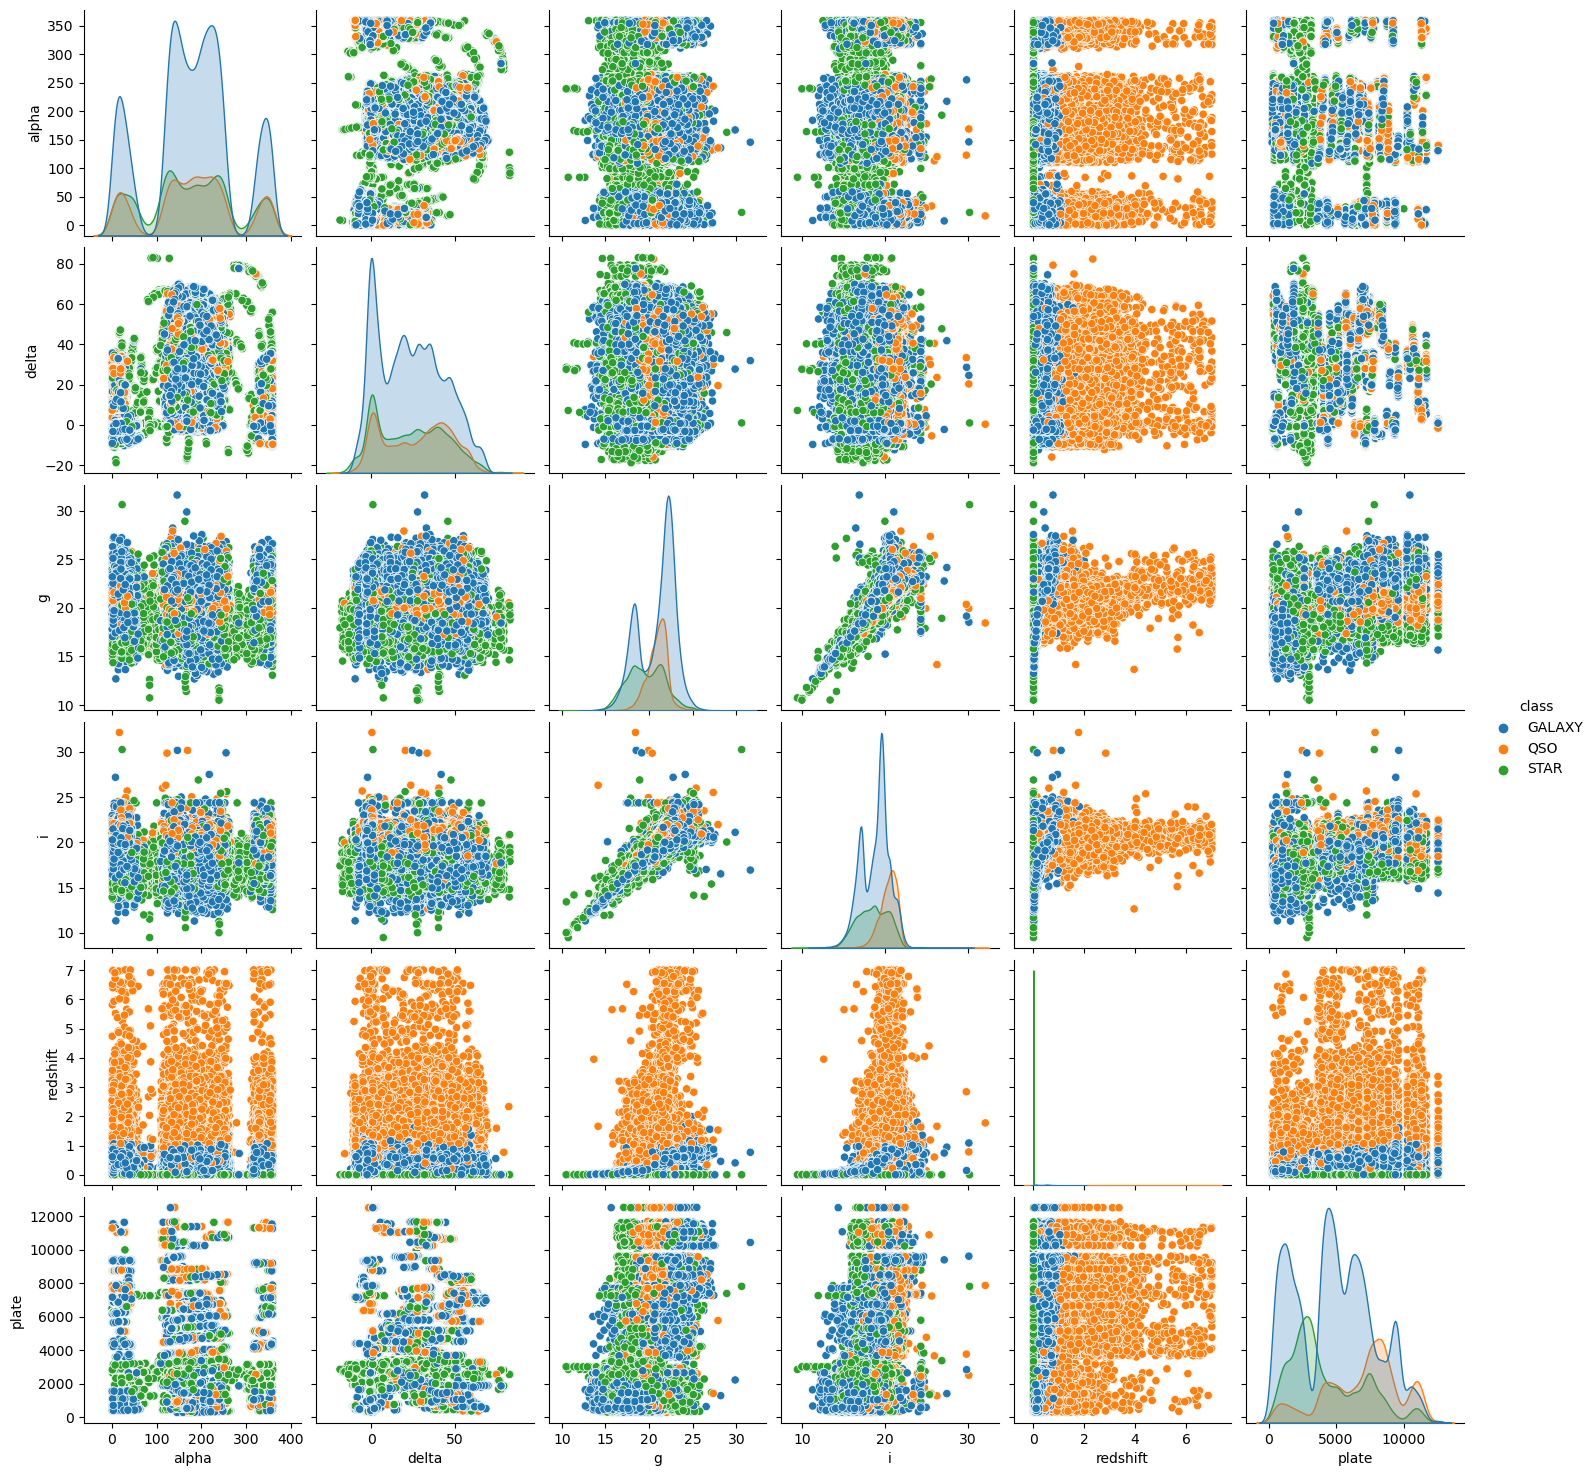

In [93]:
sns.pairplot(ref_df, kind="scatter", hue = "class")
plt.show()

<Axes: >

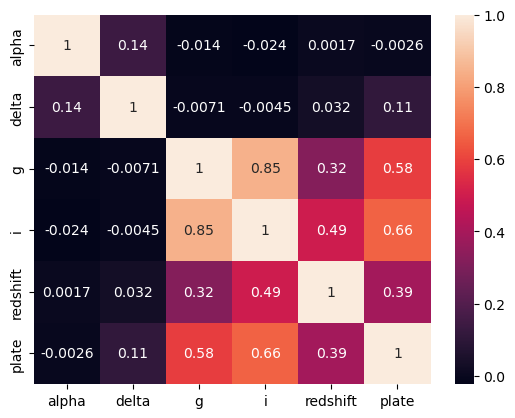

In [19]:
cor = ref_df.iloc[:,:-1].corr()
sns.heatmap(cor, annot=cor)

## Wnioski z ponownej analizy eksplotacyjnej danych

#### Analiza wykresów punktowych
Dane są moło rozróznialnie, klasy na wielu wykresach nachodzą na siebie, nie ma widocznych podziałów pomiędzy trzema klasami. Mimo to można wzkazać na obiecujące atrybuty pod względem klasyfikacji:
* redshift - Klasa QSO zajmuje większość wykresu, pozostałe dane (zwłąszcza klasa Star) są na w bardzo wąskiej grupie na skraju wykresu. Atrybut może pozwolić na znaczące rozróżnie klasy QSO od reszty.
* alpha dzieli dane na 3 główne grupy - trójmodalny histogram.

#### Analiza wykresów pudełkowych
Rozkład klas we wszystkich atrybutach, z wyjątkiem redshift jest równomierny, klasy zmieniają się w podobnym dla danego atrybuty, zakresie. W atrybucie redshift każda klasa zmiania się w róznym zakresie.

Atrybuty zmieniają sie w różnych zakresach, atrybut plate ma dane rozmieszczone w przecidziale od 0 do 12000, a refshift tylko od 0 do 7. Może to stanowić problem, przypadku klasyfikacji, na danych należy wykonać standaryzację.

#### Analiza mapy ciepła 
Atrybuty g oraz i wykazują duży poziom koleracji, znacznie wczasniej niż poprzednio. Kolrelacjia nie jest na tyle wielka aby trakotwać jeden z atrybutów jako nadmiarowy. Prawdopodobną przyczyną tej zmiany jest usunięcy punku oddalogo.

#### Wnioski ogólne

Ramka danych zawiera jedną daną mniej, z powodu usunięcie punku odstającego. Rozkład klas się nie zmienił.

### Definicje metod do testowania róznych klasyfikatorów oraz metod podziału dancyh na zrbiór uczący i testowy.

#### Najwarzeniejsze metody:

* split_data - Dzieli dane na zbiór uczący i testowy, dokonuje standaryzacji.

* visualise_classification - Pokazyje graficznie wyniki klasyfikacji na 2 wykresach i macierzach pomyłem dla zbioru uczącego i testowego.

* test_model - Dokonuje klasyfikacji dla wybranego modelu i podanego zakresu podziału danych. 

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

def split_data(df,df_class,test_size):
    data_train,data_test,cl_train,cl_test = train_test_split(df,df_class,test_size=test_size)
    scalar = StandardScaler()
    data_train = scalar.fit_transform(data_train)
    data_test  = scalar.transform(data_test)
    return {"data_train":data_train, "data_test":data_test, "cl_train":cl_train, "cl_test":cl_test}


def plot_conf_matrix(cm, axis, title):
    class_names = ['galaxy', 'star', 'qso']
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names, ax=axis)
    axis.set_xlabel('Wyniki klasyfikacji')
    axis.set_ylabel('Obecne')
    axis.set_title(title)

def plot_confusion_matrices(model, data, title, axis1, axis2):
    res_train = model.predict(data["data_train"])
    res_test = model.predict(data["data_test"])
    
    cm = confusion_matrix(data["cl_train"], res_train)
    plot_conf_matrix(cm, axis1, f'{title} - zbiór uczący, dokładność: {round(np.sum(np.diag(cm))/np.sum(cm)*100,3)}%')
    
    cm = confusion_matrix(data["cl_test"], res_test)
    plot_conf_matrix(cm, axis2, f'{title} - zbiór testowy, dokładność: {round(np.sum(np.diag(cm))/np.sum(cm) * 100,3)}%')
    
def plot_classification(model, data, cols, axis):
    original_x_column, original_y_column = cols[0], cols[1]
    X_test, Y_test = data['data_test'], data['cl_test']
    Y_pred = model.predict(X_test)
    
    if isinstance(X_test, np.ndarray):
        column_names = ref_df.drop(columns='class').columns.tolist()
        result_df = pd.DataFrame(X_test, columns=column_names)
    else:
        result_df = X_test.copy()
    
    result_df['Predicted_class'] = Y_pred
    palette = sns.color_palette('husl', n_colors=len(Y_test.unique()))
    
    sns.scatterplot(x=original_x_column, y=original_y_column, hue='Predicted_class', data=result_df, palette=palette, ax=axis)


compare_cols = [['g', 'i'],['alpha', 'redshift']]
    
def visualise_classification(data, model):
    model.fit(data['data_train'], data['cl_train'])
    fig, axes = plt.subplots(2, 2, figsize=(15, 6))
    plt.subplots_adjust(hspace=0.6, wspace=0.3)
    plot_classification(model, data, compare_cols[0],  axes[0, 0])
    plot_classification(model, data, compare_cols[1],  axes[0, 1])
    plot_confusion_matrices(model, data, 'Macierz pomyłek', axes[1, 0], axes[1, 1])
    plt.tight_layout()
    plt.show()
    
def test_model(model, X, Y, test_size, title):
    data = split_data(X,Y,test_size)
    model.fit(data['data_train'], data['cl_train'])
    res_train = model.predict(data["data_train"])
    res_test = model.predict(data["data_test"])
    print(title)
    cm = confusion_matrix(data["cl_train"], res_train)
    print(f'\t zbiór uczący, dokładność: {round(np.sum(np.diag(cm))/np.sum(cm)*100,3)}%')
    cm = confusion_matrix(data["cl_test"], res_test)
    print(f'\t zbiór testowy, dokładność: {round(np.sum(np.diag(cm))/np.sum(cm) * 100,3)}%\n')





## Klasyfikacja

Zamierzamy przeprowadzić klasyfikację dla 4 różnych klasyfikatorów i przetestować ją dla różnych parametrów, w celu uzyskania najlepszej klasyfukacji. Wyniki będziemy porównywać za pomocą procentu dokładności klasyfikacji, macierzy pomyłek oraz 2 wykresów atrybutów alpha, redshift oraz g, i.

### Klasyfikator k-najbliższych sąsiadów

Na początku kalsyfikacja będzie testowana na dla różnej ilości sąsiadów od 1 do 10. W następnym kroku dla wybranej ilości sąsiadów klasyfikacjia zostanie przetestowana dla różego podziału grópy uczącej i testowej. Na koniec pokazana będzie macierz błędu i wykres dla najlepszego podziału grup i liczby sąsiadów.

In [55]:
X = ref_df.drop('class',axis=1)
Y = ref_df['class']
for i in range(9):
    test_model(KNeighborsClassifier(n_neighbors=i + 1), X, Y, 0.3, f'Wynik dla {i + 1} sąsiadów')

Wynik dla 1 sąsiadów
	 zbiór uczący, dokładność: 100.0%
	 zbiór testowy, dokładność: 93.99%

Wynik dla 2 sąsiadów
	 zbiór uczący, dokładność: 96.787%
	 zbiór testowy, dokładność: 93.52%

Wynik dla 3 sąsiadów
	 zbiór uczący, dokładność: 96.737%
	 zbiór testowy, dokładność: 94.96%

Wynik dla 4 sąsiadów
	 zbiór uczący, dokładność: 96.031%
	 zbiór testowy, dokładność: 94.627%

Wynik dla 5 sąsiadów
	 zbiór uczący, dokładność: 96.0%
	 zbiór testowy, dokładność: 94.937%

Wynik dla 6 sąsiadów
	 zbiór uczący, dokładność: 95.584%
	 zbiór testowy, dokładność: 94.707%

Wynik dla 7 sąsiadów
	 zbiór uczący, dokładność: 95.65%
	 zbiór testowy, dokładność: 94.66%

Wynik dla 8 sąsiadów
	 zbiór uczący, dokładność: 95.324%
	 zbiór testowy, dokładność: 94.69%

Wynik dla 9 sąsiadów
	 zbiór uczący, dokładność: 95.354%
	 zbiór testowy, dokładność: 94.603%



Klasyfikator wykazuje podobne rezultaty dla różej ilości sąsiadów - ponad 94% dokładności. W każdym przypadku zbiór uczący ma lepszą dokładność od zbioru testowego. Najbardziej optymalną klasyfikacje otrzymujemy dla 3 sąsiadów.

In [62]:
for i in range(9):
    test_model(KNeighborsClassifier(n_neighbors= 3),X,Y, (i+1)/10, f'Wynik dla podziału: {(i+1)/10}')

Wynik dla podziału: 0.1
	 zbiór uczący, dokładność: 96.879%
	 zbiór testowy, dokładność: 95.12%

Wynik dla podziału: 0.2
	 zbiór uczący, dokładność: 96.817%
	 zbiór testowy, dokładność: 95.055%

Wynik dla podziału: 0.3
	 zbiór uczący, dokładność: 96.829%
	 zbiór testowy, dokładność: 94.99%

Wynik dla podziału: 0.4
	 zbiór uczący, dokładność: 96.632%
	 zbiór testowy, dokładność: 94.88%

Wynik dla podziału: 0.5
	 zbiór uczący, dokładność: 96.67%
	 zbiór testowy, dokładność: 94.744%

Wynik dla podziału: 0.6
	 zbiór uczący, dokładność: 96.582%
	 zbiór testowy, dokładność: 94.342%

Wynik dla podziału: 0.7
	 zbiór uczący, dokładność: 96.39%
	 zbiór testowy, dokładność: 94.236%

Wynik dla podziału: 0.8
	 zbiór uczący, dokładność: 96.165%
	 zbiór testowy, dokładność: 93.672%

Wynik dla podziału: 0.9
	 zbiór uczący, dokładność: 95.52%
	 zbiór testowy, dokładność: 92.792%



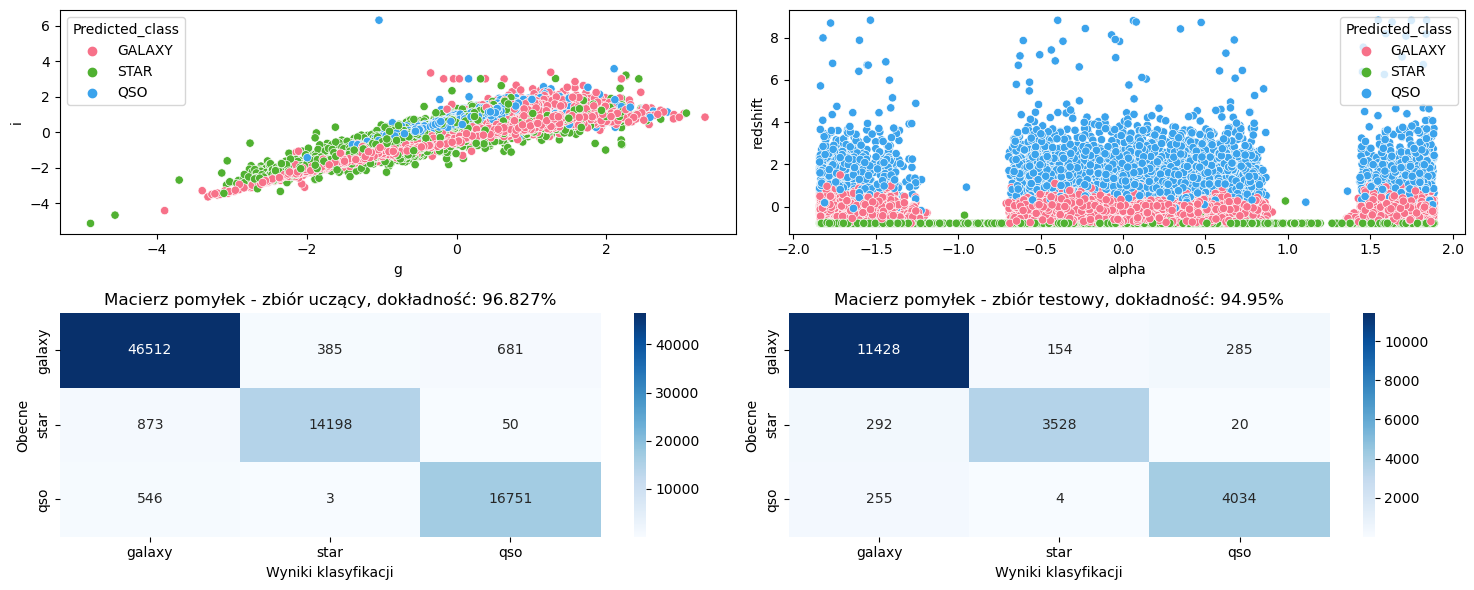

In [48]:
visualise_classification(split_data(X, Y, 0.2), KNeighborsClassifier(n_neighbors=3))

### Klasyfikator najbliższych centroidów
Powtórzymy proces wykonany dla K-NN, tym razem zamiast wyboru liczy sąsiadów bedziemy sprawdzali różne wartości parametru shrink_threshold określającego, jakie cechy są traktowane jako nieistotne. 

In [ ]:
from sklearn.neighbors import NearestCentroid
   
for i in range(9):
    test_model(NearestCentroid(shrink_threshold=i + 1), X, Y, 0.3, f'Wynik dla shrink_threshold = {i + 1}')

Klasyfikator najbliższych centroidów wypada znacznie gorzej od klasyfikatora k-NN, jego wynik jest dla nas nie akceptowalny dlatego opuścimy część z wyborem optymalnego podziału grupy.

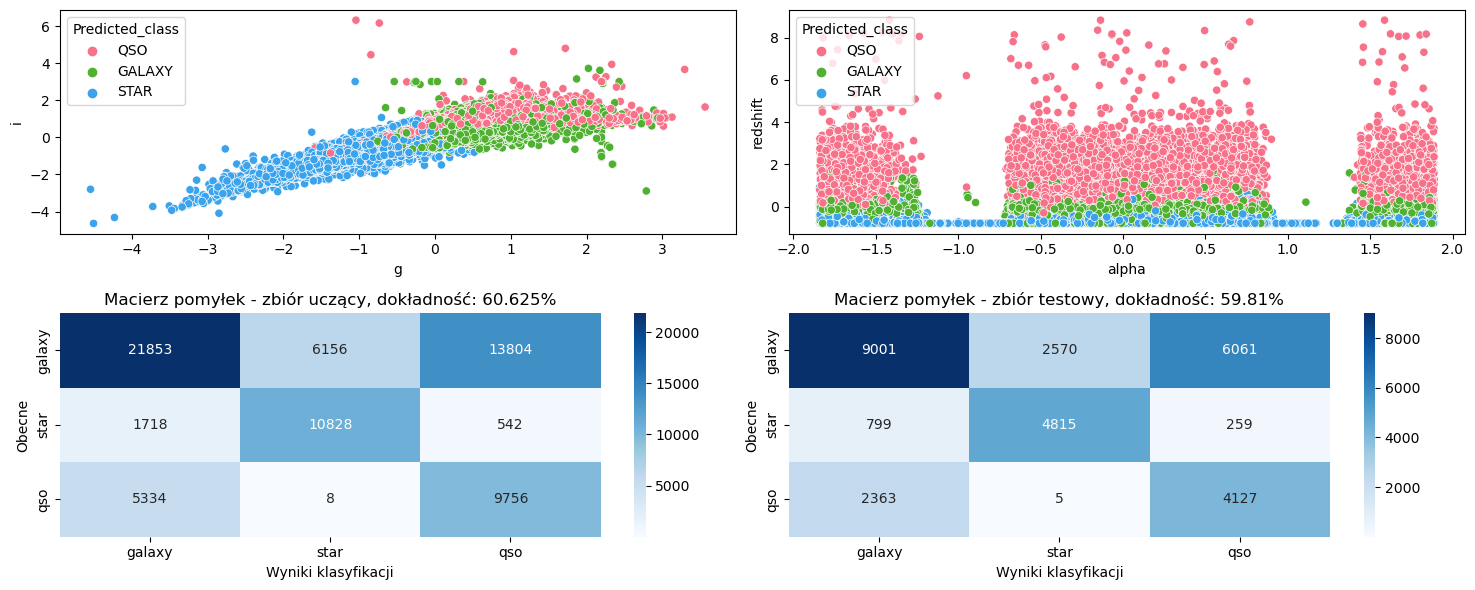

In [60]:
visualise_classification(split_data(X,Y,0.3), NearestCentroid())

### Naiwny klasyfikator Bayesa
W tym klasyfikatorze przetesujemy jedynie wpływ podziały grup na wybiki klasyfikacji

In [67]:
from sklearn.naive_bayes import GaussianNB

for i in range(9):
    test_model(GaussianNB(), X, Y, (i+1)/10, f'Wynik dla podziału: {(i+1)/10}')

Wynik dla podziału: 0.1
	 zbiór uczący, dokładność: 93.125%
	 zbiór testowy, dokładność: 93.72%

Wynik dla podziału: 0.2
	 zbiór uczący, dokładność: 93.067%
	 zbiór testowy, dokładność: 93.16%

Wynik dla podziału: 0.3
	 zbiór uczący, dokładność: 93.19%
	 zbiór testowy, dokładność: 93.387%

Wynik dla podziału: 0.4
	 zbiór uczący, dokładność: 93.397%
	 zbiór testowy, dokładność: 93.115%

Wynik dla podziału: 0.5
	 zbiór uczący, dokładność: 93.238%
	 zbiór testowy, dokładność: 92.998%

Wynik dla podziału: 0.6
	 zbiór uczący, dokładność: 93.157%
	 zbiór testowy, dokładność: 93.093%

Wynik dla podziału: 0.7
	 zbiór uczący, dokładność: 93.343%
	 zbiór testowy, dokładność: 93.156%

Wynik dla podziału: 0.8
	 zbiór uczący, dokładność: 93.165%
	 zbiór testowy, dokładność: 93.112%

Wynik dla podziału: 0.9
	 zbiór uczący, dokładność: 93.559%
	 zbiór testowy, dokładność: 93.58%



Klasyfikator wykazuje podobne rezultaty dla różej ilości sąsiadów - ponad 93% dokładności. Dokładność zbioru uczącego i testowego są niemal identyczne dla danego podziału. Różny podział grup uczęcej i testowej ma prawie zerowe przełożenie w tym przypadku.

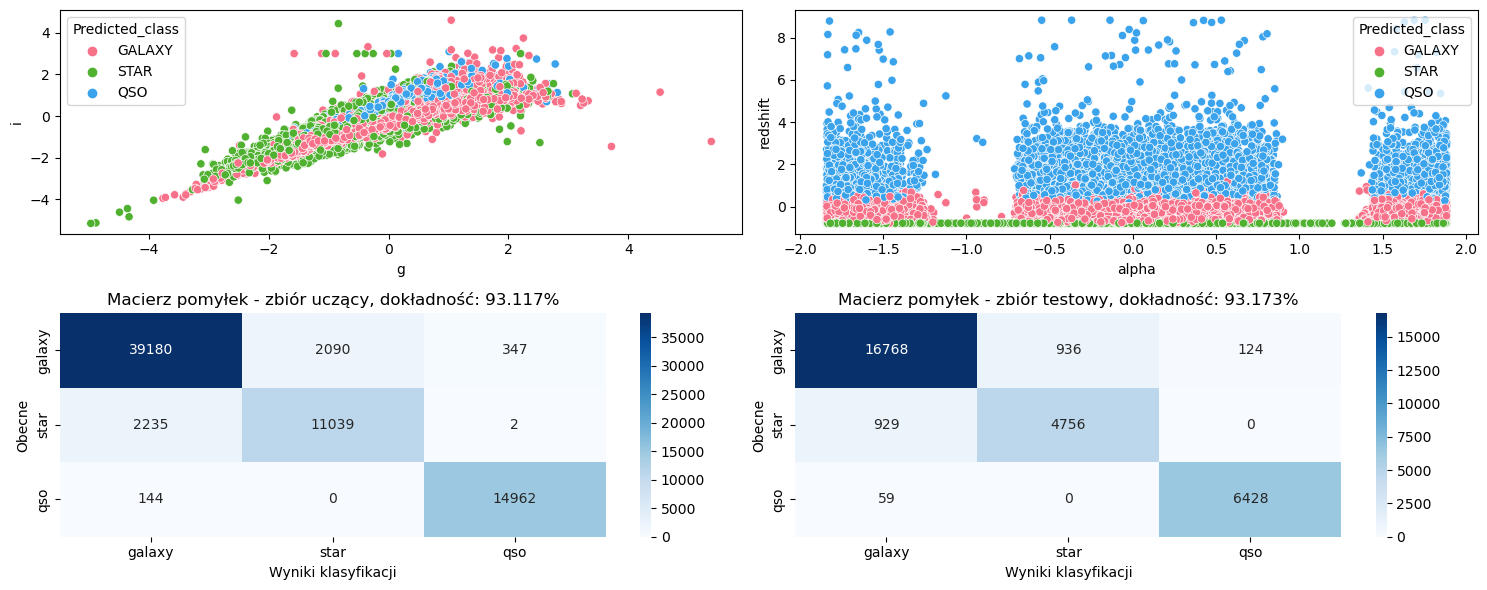

In [244]:
visualise_classification(split_data(X,Y,0.3), GaussianNB())

### Klasyfikator drzewa decyzyjnego

Przeprowadzimy zabieg analogiczny do pierwszego (dla klasyfikatora k-NN), namiast ilości sąsiadów będziemy testowali różną maksymalną głębokość drzewa. 

In [73]:
from sklearn import tree

for i in range(15):
    model = tree.DecisionTreeClassifier(max_depth= i + 1)
    test_model(model, X, Y, 0.3, f'Wynik dla maksymalnej głębokości drzewa równej: {i + 1} ')

Wynik dla maksymalnej głębokości drzewa równej: 1 
	 zbiór uczący, dokładność: 80.628%
	 zbiór testowy, dokładność: 80.28%

Wynik dla maksymalnej głębokości drzewa równej: 2 
	 zbiór uczący, dokładność: 94.84%
	 zbiór testowy, dokładność: 94.477%

Wynik dla maksymalnej głębokości drzewa równej: 3 
	 zbiór uczący, dokładność: 95.13%
	 zbiór testowy, dokładność: 95.093%

Wynik dla maksymalnej głębokości drzewa równej: 4 
	 zbiór uczący, dokładność: 96.606%
	 zbiór testowy, dokładność: 96.587%

Wynik dla maksymalnej głębokości drzewa równej: 5 
	 zbiór uczący, dokładność: 96.466%
	 zbiór testowy, dokładność: 96.347%

Wynik dla maksymalnej głębokości drzewa równej: 6 
	 zbiór uczący, dokładność: 97.123%
	 zbiór testowy, dokładność: 97.003%

Wynik dla maksymalnej głębokości drzewa równej: 7 
	 zbiór uczący, dokładność: 97.284%
	 zbiór testowy, dokładność: 97.103%

Wynik dla maksymalnej głębokości drzewa równej: 8 
	 zbiór uczący, dokładność: 97.741%
	 zbiór testowy, dokładność: 97.44%

Wyni

Poza głębokości poza 1 przezentują znakomite rezultaty klsyfikacji - powyżej 96%. Najbardziej optymalne wydaje się głębokości powyżej 9 gdzie dokładności zriotów uczących i testowych wynoszą w granicach 97-98%. W dalszej części wybierzemy głębokość 10.

In [74]:
model = tree.DecisionTreeClassifier(max_depth= 10)
    
for i in range(9):
    test_model(model, X, Y, (i+1)/10, f'Wynik dla podziału: {(i+1)/10}')

Wynik dla podziału: 0.1
	 zbiór uczący, dokładność: 98.122%
	 zbiór testowy, dokładność: 97.45%

Wynik dla podziału: 0.2
	 zbiór uczący, dokładność: 98.19%
	 zbiór testowy, dokładność: 97.42%

Wynik dla podziału: 0.3
	 zbiór uczący, dokładność: 98.256%
	 zbiór testowy, dokładność: 97.24%

Wynik dla podziału: 0.4
	 zbiór uczący, dokładność: 98.327%
	 zbiór testowy, dokładność: 97.28%

Wynik dla podziału: 0.5
	 zbiór uczący, dokładność: 98.31%
	 zbiór testowy, dokładność: 97.274%

Wynik dla podziału: 0.6
	 zbiór uczący, dokładność: 98.425%
	 zbiór testowy, dokładność: 97.232%

Wynik dla podziału: 0.7
	 zbiór uczący, dokładność: 98.6%
	 zbiór testowy, dokładność: 96.99%

Wynik dla podziału: 0.8
	 zbiór uczący, dokładność: 98.58%
	 zbiór testowy, dokładność: 96.947%

Wynik dla podziału: 0.9
	 zbiór uczący, dokładność: 98.33%
	 zbiór testowy, dokładność: 96.436%



Tak jak w przypadku klasyfikatora k-NN różny podział grup uczęcej i testowej ma małe przełożenie na wynik klasyfikacji, wyniki różnią między sobę w granicach 1 punktu procentowego.

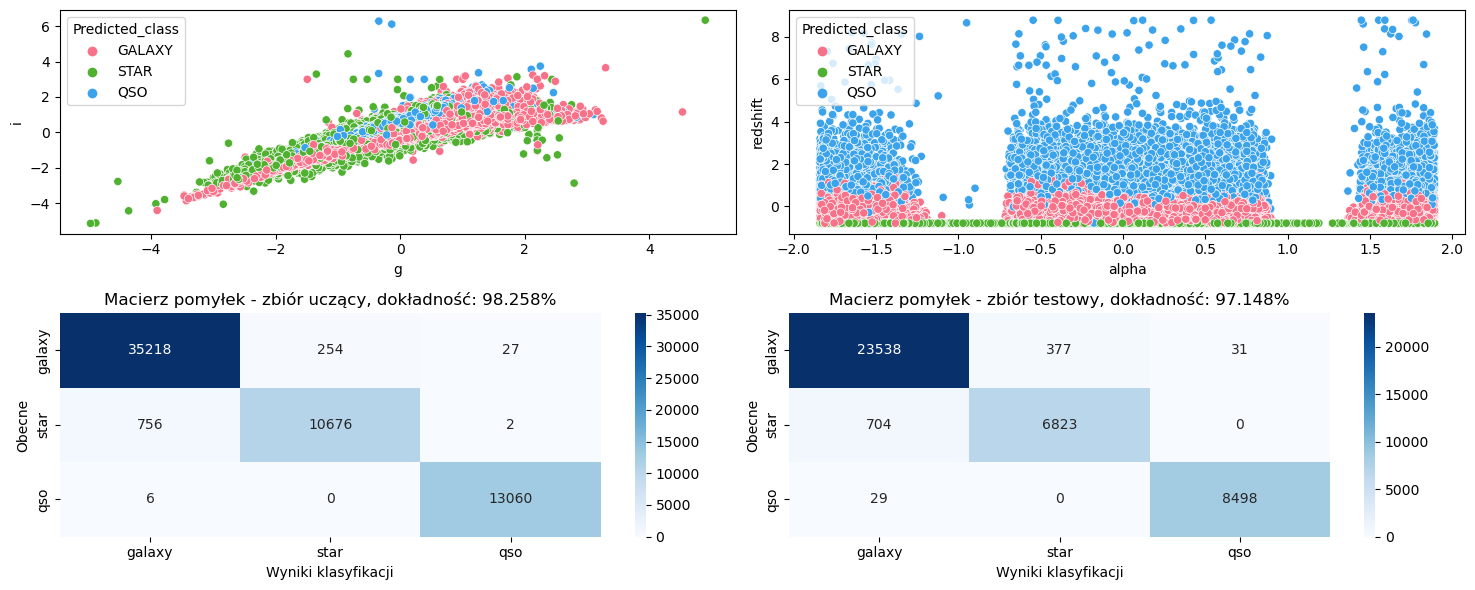

In [75]:
visualise_classification(split_data(X,Y,0.4), model)

## Wyniki klasyfikacji

W klasyfikacji zbioru gwiazd najlesze wyniki uzyskał klasyfikator drzewa decyzyjnego. Klasyfikatory najbliższych sąsiadów i Bayesa osiągnały zadowalające wyniki, jednach ich dokładność nie była aż tak duża jak drzewa decyzyjnego. Rezultaty klasyfikatora najbliżysz centroidów są bardzo słabe na poziome 60% poprawności.